In [3]:
import pandas as pd
#import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("training_data.csv")
df.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [5]:
df.shape

(49, 6)

In [6]:
# THESE ARE THR TYPES OF CROP.
df.Crop.unique()

array(['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY',
       'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT'], dtype=object)

In [7]:
# THESE ARE STATES
df.State.unique()

array(['Uttar Pradesh', 'Karnataka', 'Gujarat', 'Andhra Pradesh',
       'Maharashtra', 'Punjab', 'Haryana', 'Rajasthan', 'Madhya Pradesh',
       'Tamil Nadu', 'Bihar', 'Orissa', 'West Bengal'], dtype=object)

In [8]:
df.rename(columns={"Cost of Cultivation (`/Hectare) C2": "Cost of Fertilizers"},inplace=True)
df.rename(columns={"Cost of Cultivation (`/Hectare) A2+FL":"Cost of Cultivation(/ Hectare)"},inplace=True)
df.rename(columns={"Cost of Production (`/Quintal) C2":"Cost of Production(Quintal/ Hectare)"},inplace=True)
df.rename(columns={"Yield (Quintal/ Hectare)":"Yield (Quintal/ Hectare)"},inplace=True)

In [9]:
df.to_csv('dataset.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  49 non-null     object 
 1   State                                 49 non-null     object 
 2   Cost of Cultivation(/ Hectare)        49 non-null     float64
 3   Cost of Fertilizers                   49 non-null     float64
 4   Cost of Production(Quintal/ Hectare)  49 non-null     float64
 5   Yield (Quintal/ Hectare)              49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [11]:
df.State.unique()

array(['Uttar Pradesh', 'Karnataka', 'Gujarat', 'Andhra Pradesh',
       'Maharashtra', 'Punjab', 'Haryana', 'Rajasthan', 'Madhya Pradesh',
       'Tamil Nadu', 'Bihar', 'Orissa', 'West Bengal'], dtype=object)

# ANALYSIS  ↓ ↓

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [14]:
df.columns

Index(['Crop', 'State', 'Cost of Cultivation(/ Hectare)',
       'Cost of Fertilizers', 'Cost of Production(Quintal/ Hectare)',
       'Yield (Quintal/ Hectare) '],
      dtype='object')

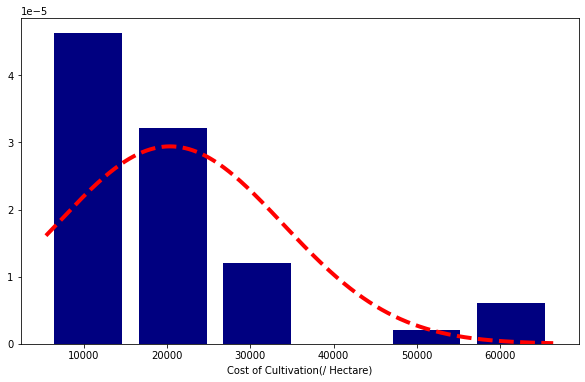

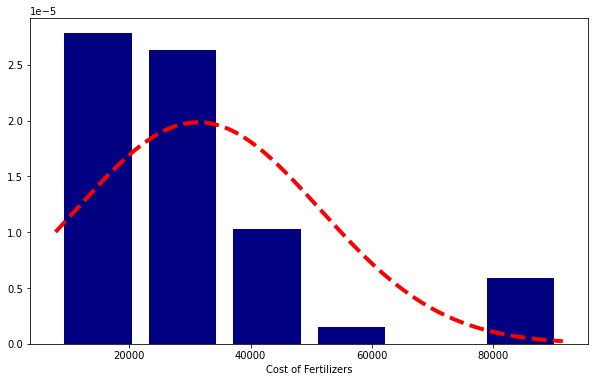

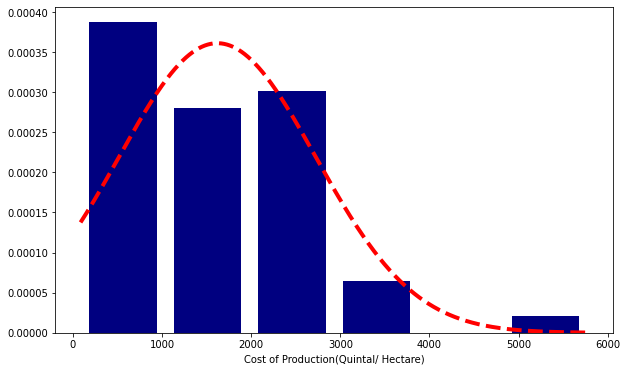

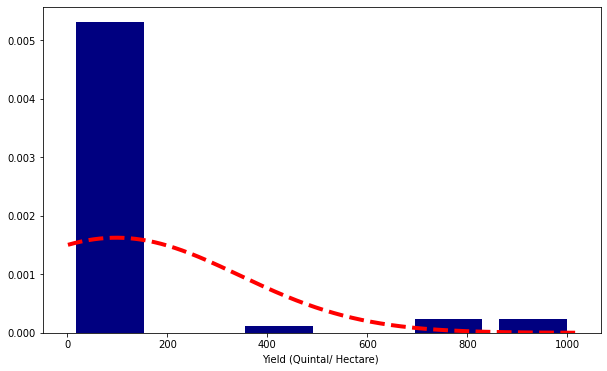

In [17]:
%matplotlib inline
for i in df.columns[2:]:
    plt.figure(figsize=(10,6))
    plt.hist(df[i],bins=6,rwidth=0.8,density=True,color='navy')
    plt.xlabel(i)

    rng = np.arange(df[i].min(),df[i].max(),0.1)
    plt.plot(rng,norm.pdf(rng,df[i].mean(),df[i].std()),'r--',linewidth=4)

In [18]:
df.columns

Index(['Crop', 'State', 'Cost of Cultivation(/ Hectare)',
       'Cost of Fertilizers', 'Cost of Production(Quintal/ Hectare)',
       'Yield (Quintal/ Hectare) '],
      dtype='object')

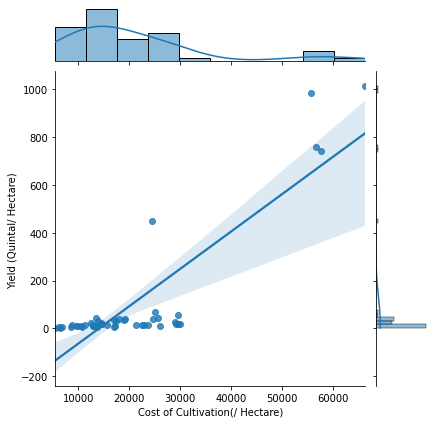

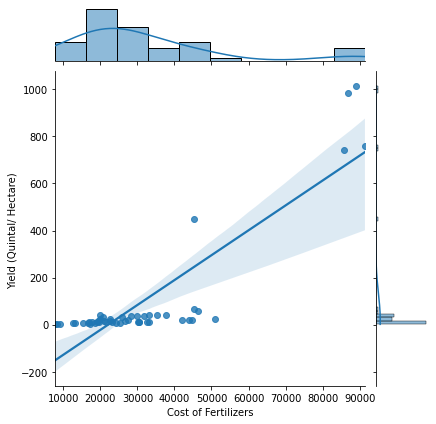

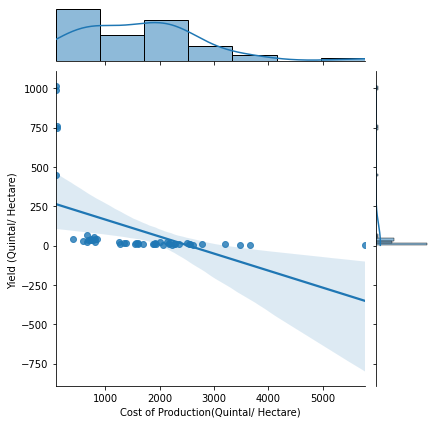

In [27]:
sn.jointplot(data=df, y="Yield (Quintal/ Hectare) ", x="Cost of Cultivation(/ Hectare)",kind='reg')
sn.jointplot(data=df, y="Yield (Quintal/ Hectare) ", x="Cost of Fertilizers",kind='reg')
sn.jointplot(data=df, y="Yield (Quintal/ Hectare) ", x="Cost of Production(Quintal/ Hectare)",kind='reg')

<AxesSubplot:xlabel='Crop', ylabel='count'>

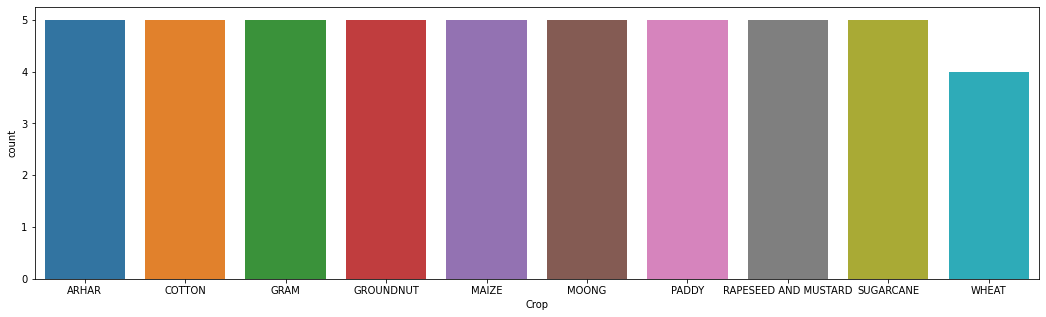

In [23]:
plt.figure(figsize=(18,5))
sn.countplot(x='Crop',data =df)

In [4]:
x=df.iloc[:,2:4]
y1=df.iloc[:,4:5]
y2=df.iloc[:,5:6]

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [7]:
pf=PolynomialFeatures()
pf2=PolynomialFeatures()

In [8]:
x_train=pf.fit_transform(x)
pf.fit(x_train,y1)


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [9]:
pf2.fit(x_train,y2)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [3]:
#lr.predict(pf2.fit_transform([[9794.05,23076.74]]))

In [36]:
lr.predict(pf2.fit_transform([[9794.05,23076.74]]))

array([[26.20918782]])

In [63]:
lr.fit(x,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
lr.predict([[9794.05,23076.74]])

array([[1253.37421442]])

import numpy
from sklearn.metrics import r2_score


mymodel = numpy.polynomial(numpy.polyfit(x_train, y1, 3))

print(r2_score(y1, mymodel(x_train)))

In [67]:
dff=pd.read_csv('dataset.csv')
dff.head(5)

,Unnamed: 0,Crop,State,Cost of Cultivation(/ Hectare),Cost of Fertilizers,Cost of Production(Quintal/ Hectare),Yield (Quintal/ Hectare)
0,0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [75]:
x=df.iloc[:,2:4]
y1=df.iloc[:,4:5]
y2=df.iloc[:,5:5+1]